In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib widget
import os
import sys
import importlib
import glob
from scipy.signal import find_peaks


module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import tools
import bode_tools
import DREAM_colors as dc
import math_functions as mf
import BodeClass_PSI as bc
import ExperimentClass as ec

importlib.reload(tools)
importlib.reload(mf)
importlib.reload(bc)
importlib.reload(ec)
importlib.reload(dc)


<module 'DREAM_colors' from 'c:\\Users\\Orlando\\Desktop\\DREAM_repo\\DREAM_colors.py'>

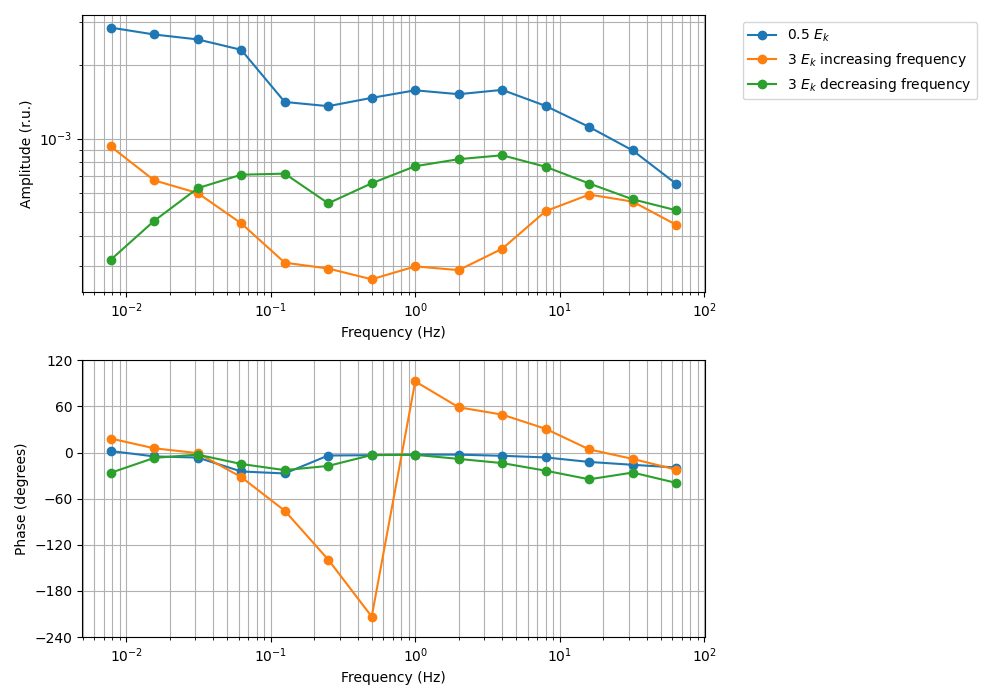

In [2]:
names = ["20240918_bode_stt71A6_control", "20240924_bode_stt71A6_control_3Ek", "20240925_bode_stt71A6_control_3Ek"]
norm_Fmax = [0.9977, 1.1106, 1.0286]
A_input = [11.6, 11.1, 10.9]

ref_phase = [-17.41713528, -11.62669205,  -2.65725325,  -7.51706631,
       -13.81628302, -15.4937856 , -24.9690497 , -11.69197657,
        -7.08698514,  -3.25738282,   5.83062099,   3.30577614,
        -6.45168624,  -6.61327604]

results = []
for name in names:
    path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/harmonics.csv"
    results.append(pd.read_csv(path, index_col= False, sep=";"))


fig, ax = plt.subplots(2, 1, figsize = (10, 7))
labels = ["0.5 $E_k$", "3 $E_k$ increasing frequency", "3 $E_k$ decreasing frequency"]

for i, result in enumerate(results):
    
    harmonics = result

    ax[0].loglog(harmonics['f_input'], harmonics['A_0']/(norm_Fmax[i] * A_input[i]), '-o', label = labels[i])


    phase = harmonics['P_0'] - 180 - ref_phase

    ax[1].semilogx(harmonics['f_input'], phase, '-o', label = labels[i])


ax[0].set_xlabel("Frequency (Hz)")

ax[0].grid(which = 'both')
ax[1].set_xlabel("Frequency (Hz)")

ax[1].grid(which = 'both')

ax[1].set_ylim(-100, 100)
ax[1].set_yticks(np.arange(-240, 90 + 60, 60))

# ax[0] = tools.bode_plot_axes(ax[0])
# ax[1] = tools.bode_plot_axes_phase(ax[1])

ax[0].set_ylabel("Amplitude (r.u.)")
ax[1].set_ylabel("Phase (degrees)")

ax[0].legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')

fig.tight_layout()

fig.savefig("C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/20240924_bode_stt71A6_control_3Ek" + "/bode_plot_compare.png", dpi = 500)


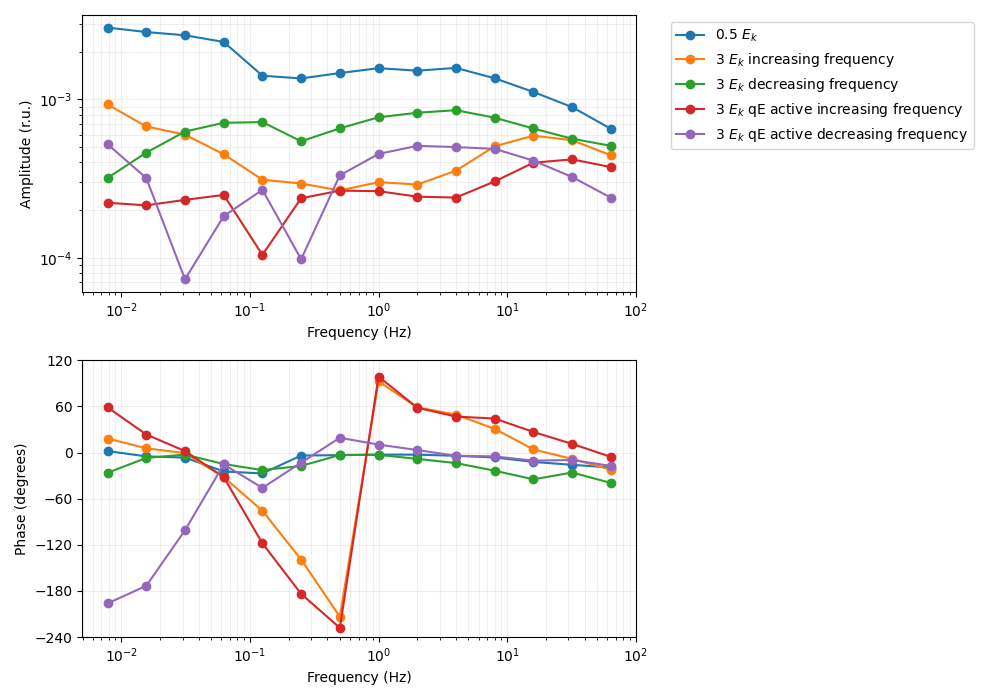

In [3]:
names = ["20240918_bode_stt71A6_control", "20240924_bode_stt71A6_control_3Ek", "20240925_bode_stt71A6_control_3Ek", 
         "20240927_bode_stt71A6_qE_active_3Ek", "20240930_bode_stt71A6_qE_active_3Ek"]


norm_Fmax = [0.9977, 1.1106, 1.0286, 0.8041, 1.0195]
A_input = [11.6, 11.1, 10.9, 13.4, 13]

ref_phase = [-17.41713528, -11.62669205,  -2.65725325,  -7.51706631,
       -13.81628302, -15.4937856 , -24.9690497 , -11.69197657,
        -7.08698514,  -3.25738282,   5.83062099,   3.30577614,
        -6.45168624,  -6.61327604]

results = []
for name in names:
    path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/harmonics.csv"
    results.append(pd.read_csv(path, index_col= False, sep=";"))


fig, ax = plt.subplots(2, 1, figsize = (10, 7))
labels = ["0.5 $E_k$", "3 $E_k$ increasing frequency", "3 $E_k$ decreasing frequency", "3 $E_k$ qE active increasing frequency", "3 $E_k$ qE active decreasing frequency"]

for i, result in enumerate(results):
    
    harmonics = result

    ax[0].loglog(harmonics['f_input'], harmonics['A_0']/(norm_Fmax[i] * A_input[i]), '-o', label = labels[i])


    phase = harmonics['P_0'] - 180 - ref_phase

    ax[1].semilogx(harmonics['f_input'], phase, '-o', label = labels[i])


ax[0].set_xlabel("Frequency (Hz)")

ax[0].grid(which = 'both', alpha = 0.2)
ax[1].set_xlabel("Frequency (Hz)")

ax[1].grid(which = 'both', alpha = 0.2)

ax[1].set_ylim(-100, 100)
ax[1].set_yticks(np.arange(-240, 90 + 60, 60))

# ax[0] = tools.bode_plot_axes(ax[0])
# ax[1] = tools.bode_plot_axes_phase(ax[1])

ax[0].set_ylabel("Amplitude (r.u.)")
ax[1].set_ylabel("Phase (degrees)")

ax[0].legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')

fig.tight_layout()

fig.savefig("C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/20240924_bode_stt71A6_control_3Ek" + "/bode_plot_compare.png", dpi = 500)


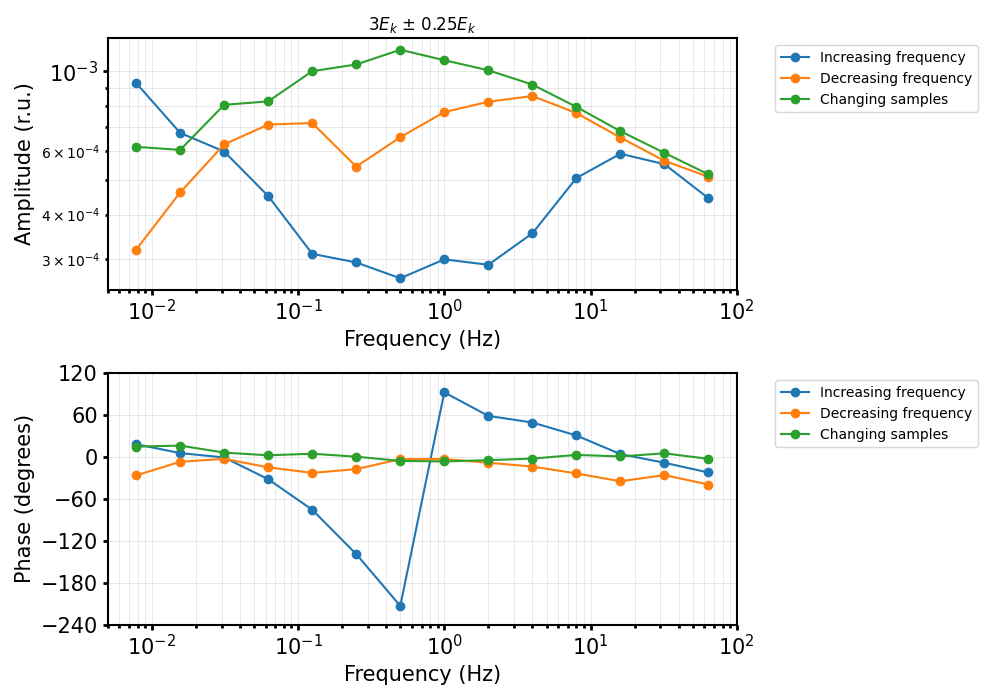

In [5]:
names = ["20240924_bode_stt71A6_control_3Ek", "20240925_bode_stt71A6_control_3Ek", "20241001_bode_stt71A6_control_3Ek"]
norm_Fmax = [1.1106, 1.0286, 1.179]
A_input = [11.1, 10.9, 11.3]

ref_phase = [-17.41713528, -11.62669205,  -2.65725325,  -7.51706631,
       -13.81628302, -15.4937856 , -24.9690497 , -11.69197657,
        -7.08698514,  -3.25738282,   5.83062099,   3.30577614,
        -6.45168624,  -6.61327604]

results = []
for name in names:
    path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/harmonics.csv"
    results.append(pd.read_csv(path, index_col= False, sep=";"))


fig, ax = plt.subplots(2, 1, figsize = (10, 7))
labels = ["Increasing frequency", "Decreasing frequency", "Changing samples"]

for i, result in enumerate(results):
    
    harmonics = result

    ax[0].loglog(harmonics['f_input'], harmonics['A_0']/(norm_Fmax[i] * A_input[i]), '-o', label = labels[i])

    phase = harmonics['P_0'] - 180 - ref_phase

    ax[1].semilogx(harmonics['f_input'], phase, '-o', label = labels[i])


ax[0].set_title("3$E_k$ ± 0.25$E_k$")
ax[0].set_xlabel("Frequency (Hz)")

ax[0].grid(which = 'both')
ax[1].set_xlabel("Frequency (Hz)")

ax[1].grid(which = 'both')

ax[1].set_ylim(-100, 100)
ax[1].set_yticks(np.arange(-240, 90 + 60, 60))

ax[0] = tools.bode_plot_axes(ax[0])
ax[1] = tools.bode_plot_axes_phase(ax[1])

ax[0].set_ylabel("Amplitude (r.u.)")
ax[1].set_ylabel("Phase (degrees)")

ax[0].legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
ax[1].legend(bbox_to_anchor = (1.05, 1), loc = 'upper left') 

fig.tight_layout()

fig.savefig("C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/20241001_bode_stt71A6_control_3Ek" + "/bode_plot_compare.png", dpi = 500)


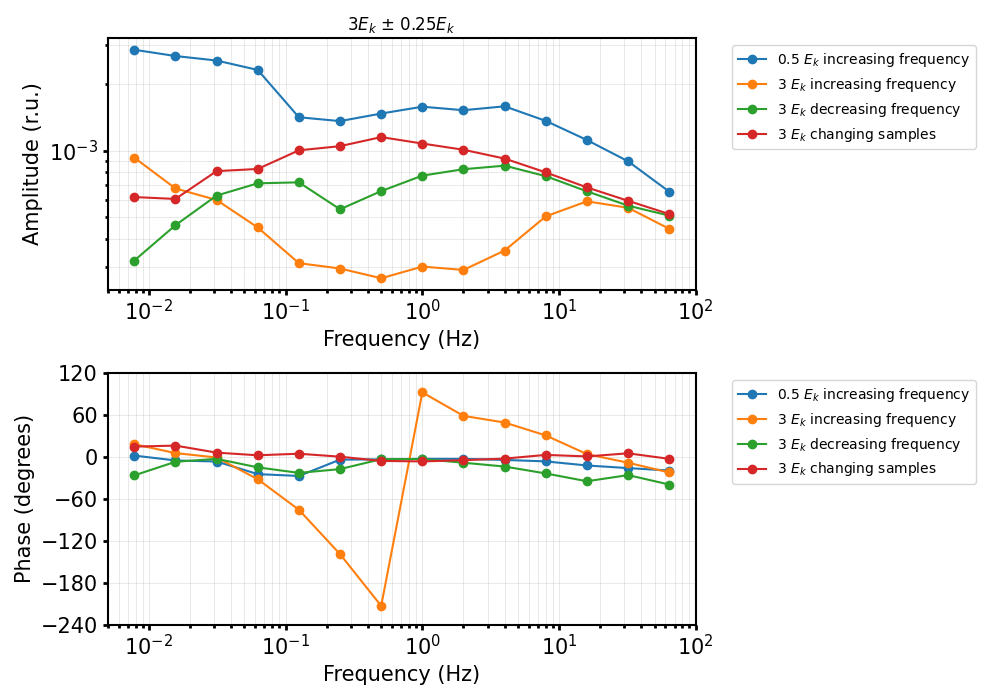

In [6]:
names = ["20240918_bode_stt71A6_control", "20240924_bode_stt71A6_control_3Ek", "20240925_bode_stt71A6_control_3Ek", "20241001_bode_stt71A6_control_3Ek"]

norm_Fmax = [0.9977, 1.1106, 1.0286, 1.179]
A_input = [11.6, 11.1, 10.9, 11.3]

ref_phase = [-17.41713528, -11.62669205,  -2.65725325,  -7.51706631,
       -13.81628302, -15.4937856 , -24.9690497 , -11.69197657,
        -7.08698514,  -3.25738282,   5.83062099,   3.30577614,
        -6.45168624,  -6.61327604]

results = []
for name in names:
    path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/harmonics.csv"
    results.append(pd.read_csv(path, index_col= False, sep=";"))


fig, ax = plt.subplots(2, 1, figsize = (10, 7))

labels = ["0.5 $E_k$ increasing frequency", "3 $E_k$ increasing frequency", "3 $E_k$ decreasing frequency", "3 $E_k$ changing samples"]

for i, result in enumerate(results):
    
    harmonics = result

    ax[0].loglog(harmonics['f_input'], harmonics['A_0']/(norm_Fmax[i] * A_input[i]), '-o', label = labels[i])

    phase = harmonics['P_0'] - 180 - ref_phase

    ax[1].semilogx(harmonics['f_input'], phase, '-o', label = labels[i])


ax[0].set_title("3$E_k$ ± 0.25$E_k$")
ax[0].set_xlabel("Frequency (Hz)")

ax[0].grid(which = 'both')
ax[1].set_xlabel("Frequency (Hz)")

ax[1].grid(which = 'both')

ax[1].set_ylim(-100, 100)
ax[1].set_yticks(np.arange(-240, 90 + 60, 60))

ax[0] = tools.bode_plot_axes(ax[0])
ax[1] = tools.bode_plot_axes_phase(ax[1])

ax[0].set_ylabel("Amplitude (r.u.)")
ax[1].set_ylabel("Phase (degrees)")

ax[0].legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
ax[1].legend(bbox_to_anchor = (1.05, 1), loc = 'upper left') 

fig.tight_layout()

fig.savefig("C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/20241001_bode_stt71A6_control_3Ek" + "/bode_plot_compare.png", dpi = 500)


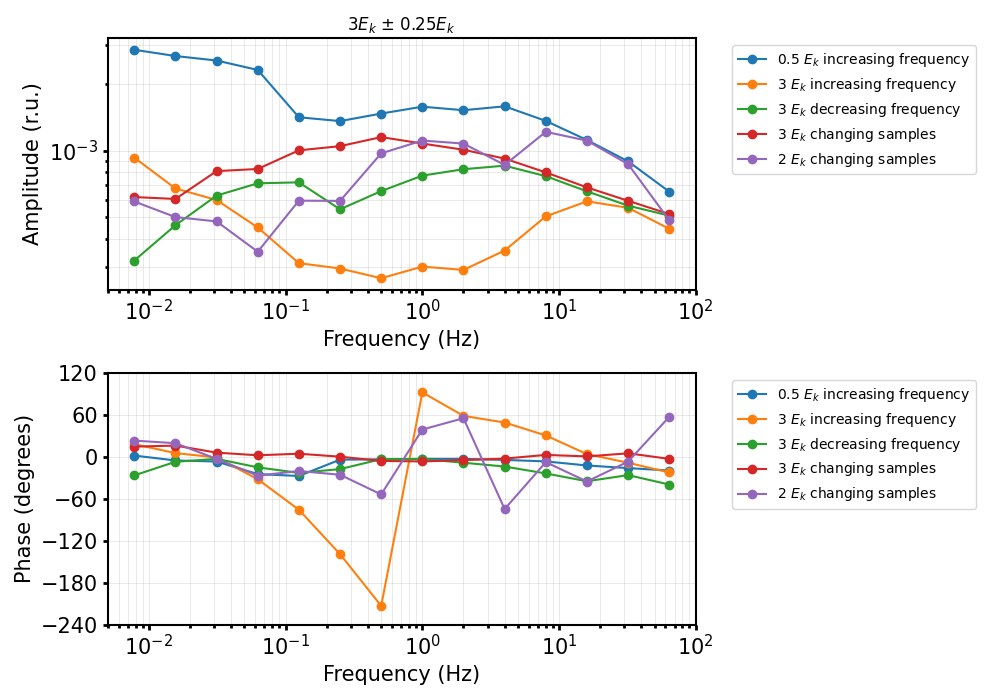

In [7]:
names = ["20240918_bode_stt71A6_control", "20240924_bode_stt71A6_control_3Ek", "20240925_bode_stt71A6_control_3Ek", "20241001_bode_stt71A6_control_3Ek", "20241002_bode_stt71A6_control_2Ek"]

norm_Fmax = [0.9977, 1.1106, 1.0286, 1.179, 1.1961]
A_input = [11.6, 11.1, 10.9, 11.3, 11.4]

ref_phase = [-17.41713528, -11.62669205,  -2.65725325,  -7.51706631,
       -13.81628302, -15.4937856 , -24.9690497 , -11.69197657,
        -7.08698514,  -3.25738282,   5.83062099,   3.30577614,
        -6.45168624,  -6.61327604]

results = []
for name in names:
    path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/harmonics.csv"
    results.append(pd.read_csv(path, index_col= False, sep=";"))


fig, ax = plt.subplots(2, 1, figsize = (10, 7))

labels = ["0.5 $E_k$ increasing frequency", "3 $E_k$ increasing frequency", "3 $E_k$ decreasing frequency", "3 $E_k$ changing samples", "2 $E_k$ changing samples"]

for i, result in enumerate(results):
    
    harmonics = result

    ax[0].loglog(harmonics['f_input'], harmonics['A_0']/(norm_Fmax[i] * A_input[i]), '-o', label = labels[i])

    phase = harmonics['P_0'] - 180 - ref_phase

    ax[1].semilogx(harmonics['f_input'], phase, '-o', label = labels[i])


ax[0].set_title("3$E_k$ ± 0.25$E_k$")
ax[0].set_xlabel("Frequency (Hz)")

ax[0].grid(which = 'both')
ax[1].set_xlabel("Frequency (Hz)")

ax[1].grid(which = 'both')

ax[1].set_ylim(-100, 100)
ax[1].set_yticks(np.arange(-240, 90 + 60, 60))

ax[0] = tools.bode_plot_axes(ax[0])
ax[1] = tools.bode_plot_axes_phase(ax[1])

ax[0].set_ylabel("Amplitude (r.u.)")
ax[1].set_ylabel("Phase (degrees)")

ax[0].legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
ax[1].legend(bbox_to_anchor = (1.05, 1), loc = 'upper left') 

fig.tight_layout()

fig.savefig("C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/20241001_bode_stt71A6_control_3Ek" + "/bode_plot_compare.png", dpi = 500)


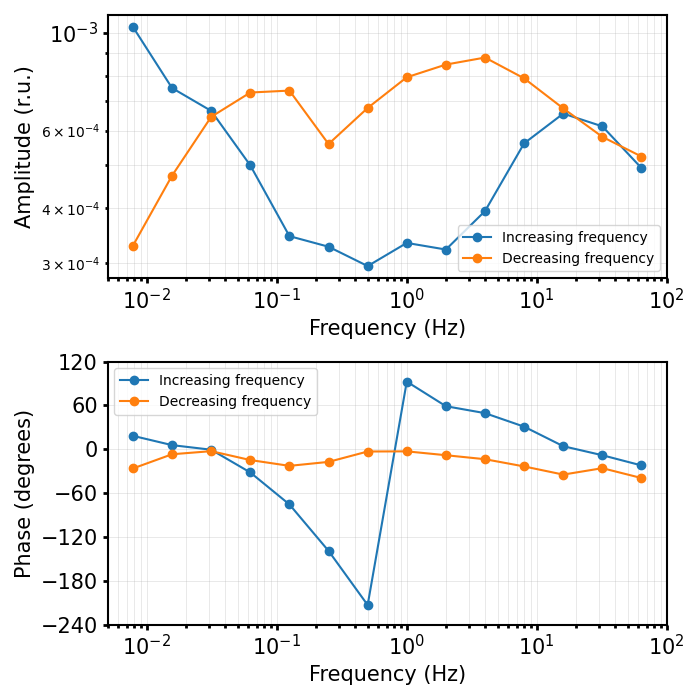

In [ ]:
names = ["20240924_bode_stt71A6_control_3Ek", "20240925_bode_stt71A6_control_3Ek"]
norm_Fmax = [1, 1]
A_input = [11.1, 10.9]

ref_phase = [-17.41713528, -11.62669205,  -2.65725325,  -7.51706631,
       -13.81628302, -15.4937856 , -24.9690497 , -11.69197657,
        -7.08698514,  -3.25738282,   5.83062099,   3.30577614,
        -6.45168624,  -6.61327604]

results = []
for name in names:
    path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/harmonics.csv"
    results.append(pd.read_csv(path, index_col= False, sep=";"))


fig, ax = plt.subplots(2, 1, figsize = (7, 7))
labels = ["Increasing frequency", "Decreasing frequency"]

for i, result in enumerate(results):
    
    harmonics = result

    ax[0].loglog(harmonics['f_input'], harmonics['A_0']/(norm_Fmax[i] * A_input[i]), '-o', label = labels[i])

    phase = harmonics['P_0'] - 180 - ref_phase

    ax[1].semilogx(harmonics['f_input'], phase, '-o', label = labels[i])


ax[0].set_xlabel("Frequency (Hz)")

ax[0].grid(which = 'both')
ax[1].set_xlabel("Frequency (Hz)")

ax[1].grid(which = 'both')

ax[1].set_ylim(-100, 100)
ax[1].set_yticks(np.arange(-240, 90 + 60, 60))

ax[0] = tools.bode_plot_axes(ax[0])
ax[1] = tools.bode_plot_axes_phase(ax[1])

ax[0].set_ylabel("Amplitude (r.u.)")
ax[1].set_ylabel("Phase (degrees)")

ax[0].legend()

fig.tight_layout()

fig.savefig("C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/20240925_bode_stt71A6_control_3Ek" + "/bode_plot_compare.png", dpi = 500)


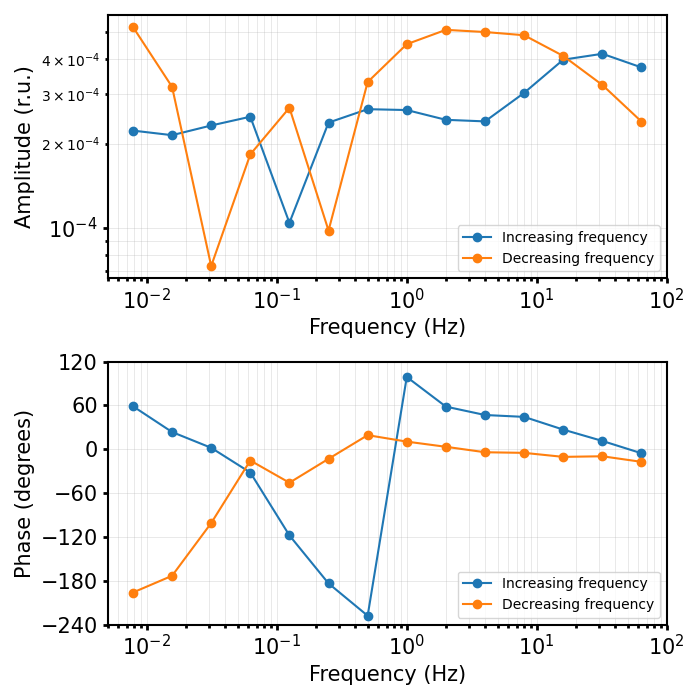

In [10]:
names = ["20240927_bode_stt71A6_qE_active_3Ek", "20240930_bode_stt71A6_qE_active_3Ek"]
norm_Fmax = [0.8041, 1.0195]
A_input = [13.4, 13]

ref_phase = [-17.41713528, -11.62669205,  -2.65725325,  -7.51706631,
       -13.81628302, -15.4937856 , -24.9690497 , -11.69197657,
        -7.08698514,  -3.25738282,   5.83062099,   3.30577614,
        -6.45168624,  -6.61327604]

results = []
for name in names:
    path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/harmonics.csv"
    results.append(pd.read_csv(path, index_col= False, sep=";"))


fig, ax = plt.subplots(2, 1, figsize = (7, 7))
labels = ["Increasing frequency", "Decreasing frequency"]

for i, result in enumerate(results):
    
    harmonics = result

    ax[0].loglog(harmonics['f_input'], harmonics['A_0']/(norm_Fmax[i] * A_input[i]), '-o', label = labels[i])

    phase = harmonics['P_0'] - 180 - ref_phase

    ax[1].semilogx(harmonics['f_input'], phase, '-o', label = labels[i])


ax[0].set_xlabel("Frequency (Hz)")

ax[0].grid(which = 'both')
ax[1].set_xlabel("Frequency (Hz)")

ax[1].grid(which = 'both')

ax[1].set_ylim(-100, 100)
ax[1].set_yticks(np.arange(-240, 90 + 60, 60))

ax[0] = tools.bode_plot_axes(ax[0])
ax[1] = tools.bode_plot_axes_phase(ax[1])

ax[0].set_ylabel("Amplitude (r.u.)")
ax[1].set_ylabel("Phase (degrees)")

ax[0].legend()

fig.tight_layout()

fig.savefig("C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/20240925_bode_stt71A6_control_3Ek" + "/bode_plot_compare.png", dpi = 500)


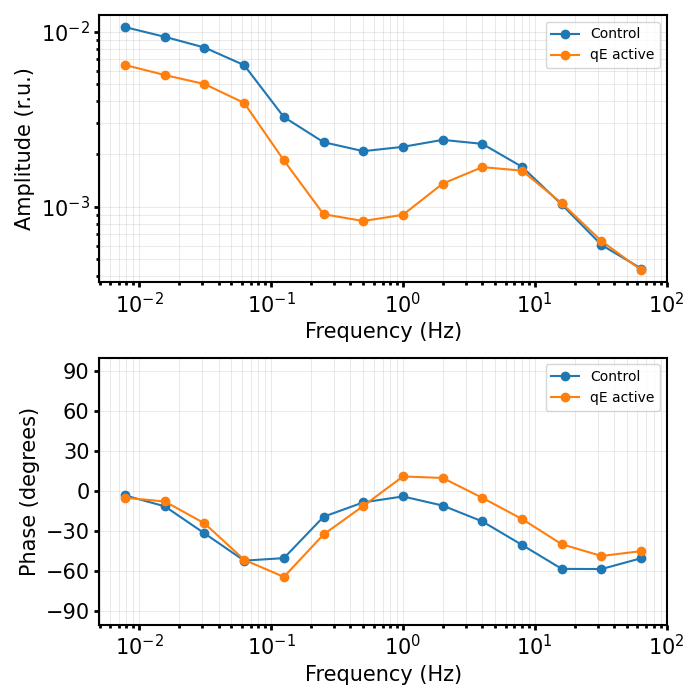

In [61]:
###### Day one ######
names = ["20240723_bode_stt71A6_control_1", "20240723_bode_stt71A6_qE_act_1"]
norm_Fmax = [0.9865909090909092, 0.8594366666666665]
A_input = [10, 15]

ref_phase = [-18.63746965,  -8.24066821,  -5.80866103,  -5.39514713, -3.89644455,  -3.70165093, -21.19220846, -11.69197657, -7.08698514,  -3.25738282,   5.83062099,   3.30577614, -6.45168624,  -6.61327604]


results = []
for name in names:
    path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/harmonics.csv"
    results.append(pd.read_csv(path, index_col= False, sep=";"))

fig, ax = plt.subplots(2, 1, figsize = (7, 7))
labels = ["Control", "qE active" ]

for i, result in enumerate(results):
    
    harmonics = result

    ax[0].loglog(harmonics['f_input'], harmonics['A_0']/(norm_Fmax[i] * A_input[i]), '-o', label = labels[i])

    phase = harmonics['P_0'] - 180 - ref_phase

    ax[1].semilogx(harmonics['f_input'], phase, '-o', label = labels[i])


ax[0].set_xlabel("Frequency (Hz)")

ax[0].grid(which = 'both')
ax[1].set_xlabel("Frequency (Hz)")

ax[1].grid(which = 'both')

ax[1].set_ylim(-100, 100)
ax[1].set_yticks(np.arange(-90, 90 + 30, 30))

ax[0] = tools.bode_plot_axes(ax[0])
ax[1] = tools.bode_plot_axes_phase(ax[1])

ax[0].set_ylabel("Amplitude (r.u.)")
ax[1].set_ylabel("Phase (degrees)")

ax[0].legend()

fig.tight_layout()

fig.savefig("C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/figures/compare_bode.png", dpi=300)



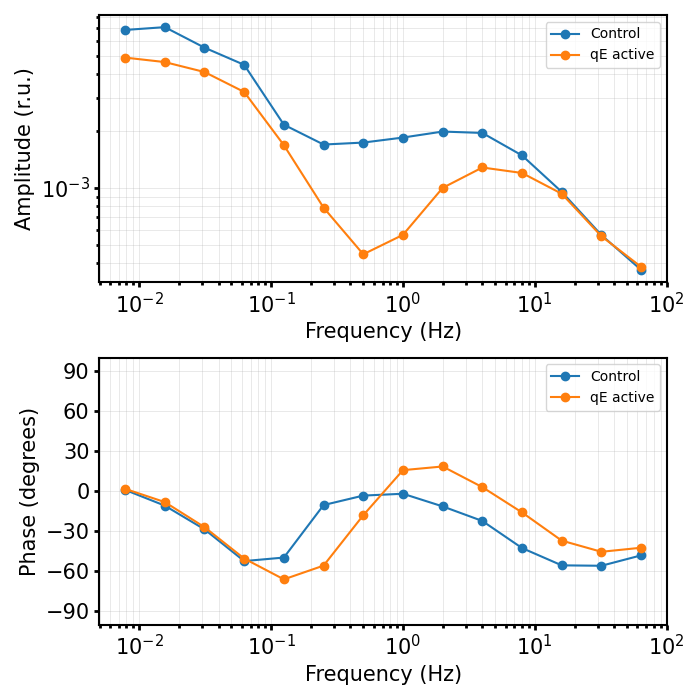

In [62]:
###### Day two ######

names = ["20240724_bode_stt71A6_control_2", "20240724_bode_stt71A6_qE_act_2"]
norm_Fmax = [0.8250509090909091, 0.7004727272727275]
A_input = [10, 18]

ref_phase = [-18.63746965,  -8.24066821,  -5.80866103,  -5.39514713, -3.89644455,  -3.70165093, -21.19220846, -11.69197657, -7.08698514,  -3.25738282,   5.83062099,   3.30577614, -6.45168624,  -6.61327604]


results = []
for name in names:
    path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/harmonics.csv"
    results.append(pd.read_csv(path, index_col= False, sep=";"))

fig, ax = plt.subplots(2, 1, figsize = (7, 7))
labels = ["Control", "qE active" ]

for i, result in enumerate(results):
    
    harmonics = result

    ax[0].loglog(harmonics['f_input'], harmonics['A_0']/(norm_Fmax[i] * A_input[i]), '-o', label = labels[i])

    phase = harmonics['P_0'] - 180 - ref_phase

    ax[1].semilogx(harmonics['f_input'], phase, '-o', label = labels[i])


ax[0].set_xlabel("Frequency (Hz)")

ax[0].grid(which = 'both')
ax[1].set_xlabel("Frequency (Hz)")

ax[1].grid(which = 'both')

ax[1].set_ylim(-100, 100)
ax[1].set_yticks(np.arange(-90, 90 + 30, 30))

ax[0] = tools.bode_plot_axes(ax[0])
ax[1] = tools.bode_plot_axes_phase(ax[1])

ax[0].set_ylabel("Amplitude (r.u.)")
ax[1].set_ylabel("Phase (degrees)")

ax[0].legend()

fig.tight_layout()

fig.savefig("C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/figures/compare_bode.png", dpi=300)



In [63]:
names = ["20240717_bode_WT4A_control_1", "20240719_bode_WT4A_qE_act_2"] + ["20240723_bode_stt71A6_control_1", "20240723_bode_stt71A6_qE_act_1"]
norm_Fmax = [0.5132951515151515, 0.5377748484848486] + [0.9865909090909092, 0.8594366666666665]
A_input = [12, 13.5] + [10, 15]

ref_phase = [-18.63746965,  -8.24066821,  -5.80866103,  -5.39514713, -3.89644455,  -3.70165093, -21.19220846, -11.69197657, -7.08698514,  -3.25738282,   5.83062099,   3.30577614, -6.45168624,  -6.61327604]


results = []
for name in names:
    path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/harmonics.csv"
    results.append(pd.read_csv(path, index_col= False, sep=";"))

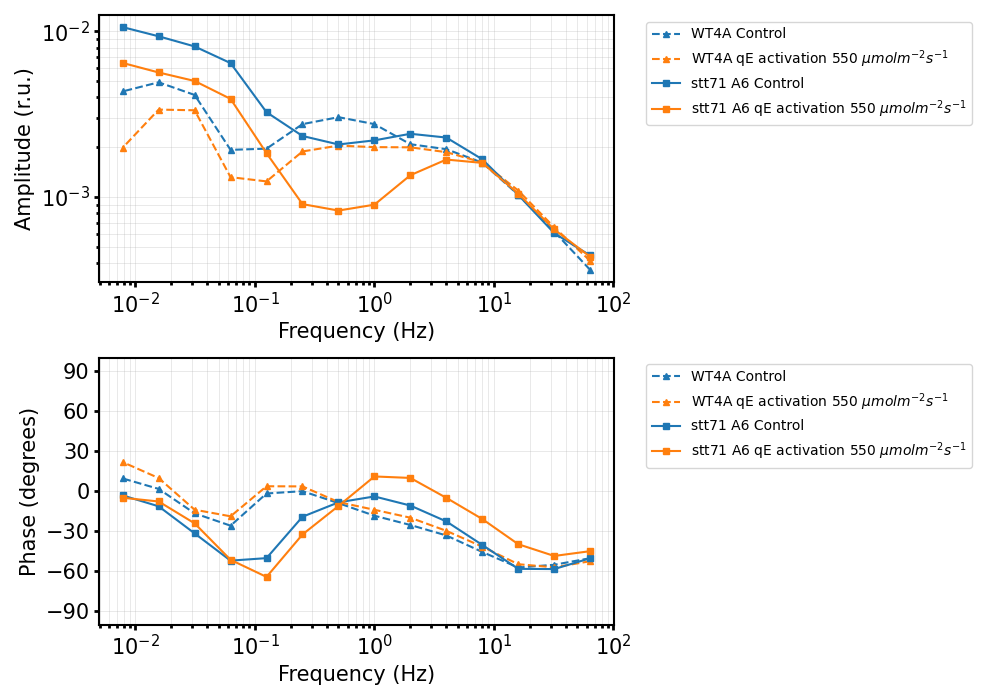

In [64]:
fig, ax = plt.subplots(2, 1, figsize = (10, 7))
labels =  ["WT4A Control", "WT4A qE activation 550 $µmol m^{-2} s^{-1}$" ] + ["stt71 A6 Control", "stt71 A6 qE activation 550 $µmol m^{-2} s^{-1}$"]
fmt = ['--^', '--^', '-s', '-s']
color = ['C0', 'C1', 'C0', "C1"]
line = 1.5
marker = 4

for i, result in enumerate(results):
    
    harmonics = result

    ax[0].loglog(harmonics['f_input'], harmonics['A_0']/(norm_Fmax[i] * A_input[i]), fmt[i], label = labels[i], linewidth = line, markersize = marker, color = color[i])

    phase = harmonics['P_0'] - 180 - ref_phase

    ax[1].semilogx(harmonics['f_input'], phase, fmt[i], label = labels[i], linewidth = line, markersize = marker, color = color[i])


ax[0].set_xlabel("Frequency (Hz)")

ax[0].grid(which = 'both')
ax[1].set_xlabel("Frequency (Hz)")

ax[1].grid(which = 'both')

ax[1].set_ylim(-100, 100)
ax[1].set_yticks(np.arange(-90, 90 + 30, 30))

ax[0] = tools.bode_plot_axes(ax[0])
ax[1] = tools.bode_plot_axes_phase(ax[1])

ax[0].set_ylabel("Amplitude (r.u.)")
ax[1].set_ylabel("Phase (degrees)")

ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

fig.tight_layout()

fig.savefig("C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/figures/compare_all_bode.png", dpi=300)



In [85]:
labels

['stt7 control 1',
 'stt7 activated 1',
 'stt7 control 2',
 'stt7 activated 2',
 'stt7 control 3stt7 activated 3']

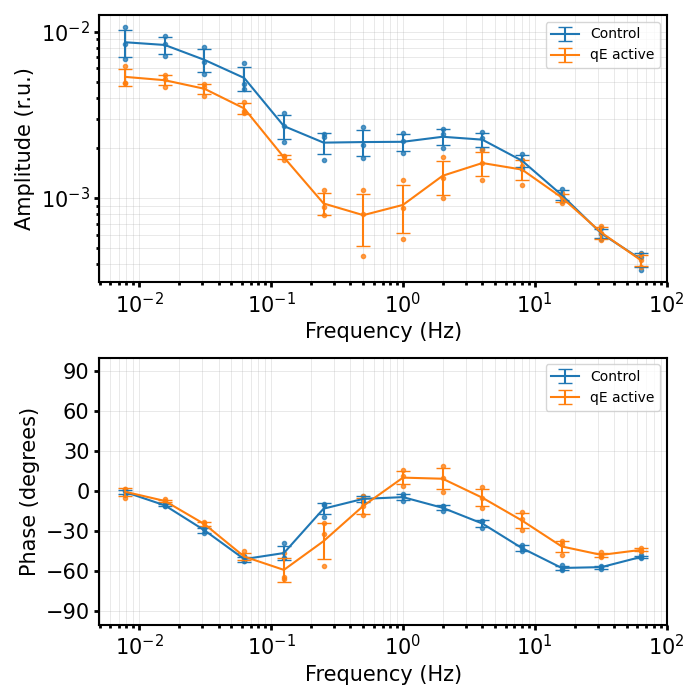

In [130]:
### Replicates fundamental frequency ###

names = ["20240723_bode_stt71A6_control_1", "20240723_bode_stt71A6_qE_act_1"] + ["20240724_bode_stt71A6_control_2", "20240724_bode_stt71A6_qE_act_2"] + ["20240725_bode_stt71A6_control_3", "20240725_bode_stt71A6_qE_act_3"]
norm_Fmax = [0.9865909090909092, 0.8594366666666665] + [0.8250509090909091, 0.7004727272727275] + [1.3158090909090907, 1.1984242424242426]
A_input = [10, 15.5] + [10, 18] + [10, 14]

ref_phase = [-18.63746965,  -8.24066821,  -5.80866103,  -5.39514713, -3.89644455,  -3.70165093, -21.19220846, -11.69197657, -7.08698514,  -3.25738282,   5.83062099,   3.30577614, -6.45168624,  -6.61327604]

results = []
for name in names:
    path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/harmonics.csv"
    results.append(pd.read_csv(path, index_col= False, sep=";"))
 
fig, ax = plt.subplots(2, 1, figsize = (7, 7))

line = 0.5
marker = 3
alpha = 0.75
fmt = 'o'

Amplitudes_ctr = []
Phases_ctr = []
Amplitudes_act = []
Phases_act = []

control = [0, 2, 4]
activated = [1, 3, 5]

for i, result in enumerate(results):
    harmonics = result
    
    if i in control:
        ax[0].loglog(harmonics['f_input'], harmonics['A_0']/(norm_Fmax[i] * A_input[i]), fmt, linewidth = line, markersize = marker, color = "C0", alpha = alpha)
        ax[1].semilogx(harmonics['f_input'], harmonics['P_0'] - 180 - ref_phase, fmt, linewidth = line, markersize = marker, color = "C0", alpha = alpha)
        Amplitudes_ctr.append(harmonics['A_0']/(norm_Fmax[i] * A_input[i]))
        Phases_ctr.append(harmonics['P_0'] - 180 - ref_phase)
    if i in activated:
        ax[0].loglog(harmonics['f_input'], harmonics['A_0']/(norm_Fmax[i] * A_input[i]), fmt, linewidth = line, markersize = marker, color = "C1", alpha = alpha)
        ax[1].semilogx(harmonics['f_input'], harmonics['P_0'] - 180 - ref_phase, fmt, linewidth = line, markersize = marker, color = "C1", alpha = alpha)
        Amplitudes_act.append(harmonics['A_0']/(norm_Fmax[i] * A_input[i]))
        Phases_act.append(harmonics['P_0'] - 180 - ref_phase)


Amplitudes_ctr = np.array(Amplitudes_ctr)
Phases_ctr = np.array(Phases_ctr)
Amplitudes_act = np.array(Amplitudes_act)
Phases_act = np.array(Phases_act)

mean_Amplitudes_ctr = np.mean(Amplitudes_ctr, axis = 0)
std_Amplitudes_ctr = np.std(Amplitudes_ctr, axis = 0)

mean_Phases_ctr = np.mean(Phases_ctr, axis = 0)
std_Phases_ctr = np.std(Phases_ctr, axis = 0)

mean_Amplitudes_act = np.mean(Amplitudes_act, axis = 0)
std_Amplitudes_act = np.std(Amplitudes_act, axis = 0)

mean_Phases_act = np.mean(Phases_act, axis = 0)
std_Phases_act = np.std(Phases_act, axis = 0)

ax[0].errorbar(harmonics['f_input'], mean_Amplitudes_ctr, yerr = std_Amplitudes_ctr, label = "Control", capsize = 5)
ax[0].errorbar(harmonics['f_input'], mean_Amplitudes_act, yerr = std_Amplitudes_act, label = "qE active", capsize = 5)

ax[1].errorbar(harmonics['f_input'], mean_Phases_ctr, yerr = std_Phases_ctr, label = "Control", capsize = 5)
ax[1].errorbar(harmonics['f_input'], mean_Phases_act, yerr = std_Phases_act, label = "qE active", capsize = 5)


ax[0].set_xlabel("Frequency (Hz)")

ax[0].grid(which = 'both')
ax[1].set_xlabel("Frequency (Hz)")

ax[1].grid(which = 'both')

ax[1].set_ylim(-100, 100)
ax[1].set_yticks(np.arange(-90, 90 + 30, 30))

ax[0] = tools.bode_plot_axes(ax[0])
ax[1] = tools.bode_plot_axes_phase(ax[1])

ax[0].set_ylabel("Amplitude (r.u.)")
ax[1].set_ylabel("Phase (degrees)")

ax[0].legend()
ax[1].legend()

fig.tight_layout()

fig.savefig("C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/figures/replicates_bode_avg_point.png", dpi=300)



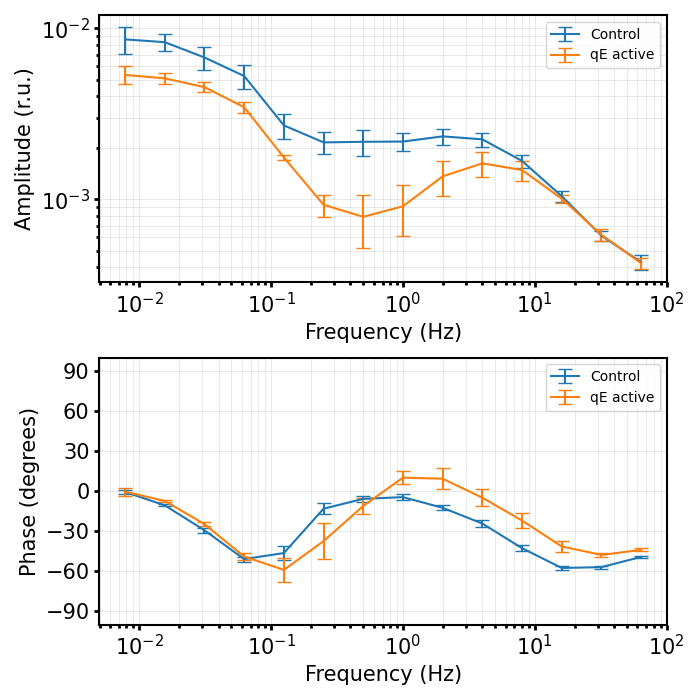

In [109]:
### Replicates fundamental frequency ###

names = ["20240723_bode_stt71A6_control_1", "20240723_bode_stt71A6_qE_act_1"] + ["20240724_bode_stt71A6_control_2", "20240724_bode_stt71A6_qE_act_2"] + ["20240725_bode_stt71A6_control_3", "20240725_bode_stt71A6_qE_act_3"]
norm_Fmax = [0.9865909090909092, 0.8594366666666665] + [0.8250509090909091, 0.7004727272727275] + [1.3158090909090907, 1.1984242424242426]
A_input = [10, 15.5] + [10, 18] + [10, 14]

ref_phase = [-18.63746965,  -8.24066821,  -5.80866103,  -5.39514713, -3.89644455,  -3.70165093, -21.19220846, -11.69197657, -7.08698514,  -3.25738282,   5.83062099,   3.30577614, -6.45168624,  -6.61327604]

results = []
for name in names:
    path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/harmonics.csv"
    results.append(pd.read_csv(path, index_col= False, sep=";"))
 
fig, ax = plt.subplots(2, 1, figsize = (7, 7))
marker = 4

Amplitudes_ctr = []
Phases_ctr = []
Amplitudes_act = []
Phases_act = []

control = [0, 2, 4]
activated = [1, 3, 5]

for i, result in enumerate(results):
    harmonics = result
    
    if i in control:
        Amplitudes_ctr.append(harmonics['A_0']/(norm_Fmax[i] * A_input[i]))
        Phases_ctr.append(harmonics['P_0'] - 180 - ref_phase)
    if i in activated:
        Amplitudes_act.append(harmonics['A_0']/(norm_Fmax[i] * A_input[i]))
        Phases_act.append(harmonics['P_0'] - 180 - ref_phase)


Amplitudes_ctr = np.array(Amplitudes_ctr)
Phases_ctr = np.array(Phases_ctr)
Amplitudes_act = np.array(Amplitudes_act)
Phases_act = np.array(Phases_act)

mean_Amplitudes_ctr = np.mean(Amplitudes_ctr, axis = 0)
std_Amplitudes_ctr = np.std(Amplitudes_ctr, axis = 0)

mean_Phases_ctr = np.mean(Phases_ctr, axis = 0)
std_Phases_ctr = np.std(Phases_ctr, axis = 0)

mean_Amplitudes_act = np.mean(Amplitudes_act, axis = 0)
std_Amplitudes_act = np.std(Amplitudes_act, axis = 0)

mean_Phases_act = np.mean(Phases_act, axis = 0)
std_Phases_act = np.std(Phases_act, axis = 0)

ax[0].errorbar(harmonics['f_input'], mean_Amplitudes_ctr, yerr = std_Amplitudes_ctr, label = "Control", capsize = 5)
ax[0].errorbar(harmonics['f_input'], mean_Amplitudes_act, yerr = std_Amplitudes_act, label = "qE active", capsize = 5)

ax[1].errorbar(harmonics['f_input'], mean_Phases_ctr, yerr = std_Phases_ctr, label = "Control", capsize = 5)
ax[1].errorbar(harmonics['f_input'], mean_Phases_act, yerr = std_Phases_act, label = "qE active", capsize = 5)


ax[0].set_xlabel("Frequency (Hz)")

ax[0].grid(which = 'both')
ax[1].set_xlabel("Frequency (Hz)")

ax[1].grid(which = 'both')

ax[1].set_ylim(-100, 100)
ax[1].set_yticks(np.arange(-90, 90 + 30, 30))

ax[0] = tools.bode_plot_axes(ax[0])
ax[1] = tools.bode_plot_axes_phase(ax[1])

ax[0].set_ylabel("Amplitude (r.u.)")
ax[1].set_ylabel("Phase (degrees)")

ax[0].legend()
ax[1].legend()

fig.tight_layout()

fig.savefig("C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/figures/replicates_bode_avg.png", dpi=300)



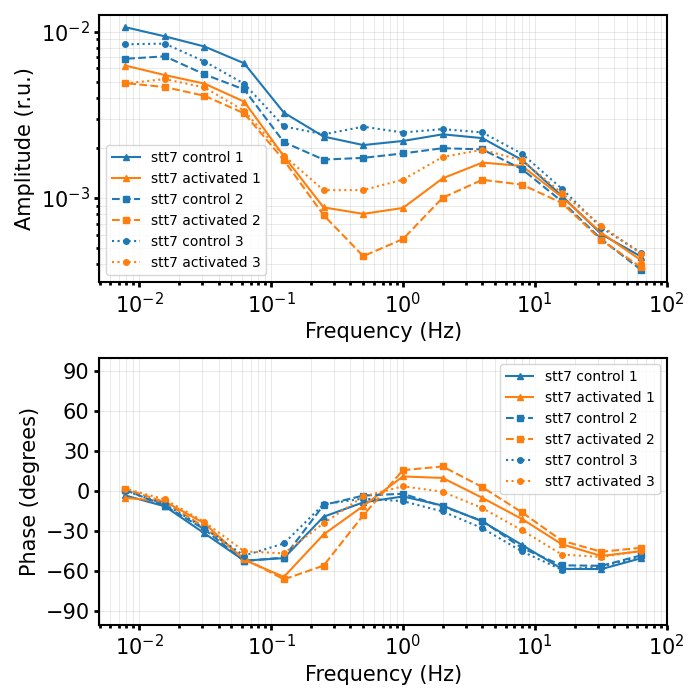

In [110]:
### Replicates fundamental frequency ###

names = ["20240723_bode_stt71A6_control_1", "20240723_bode_stt71A6_qE_act_1"] + ["20240724_bode_stt71A6_control_2", "20240724_bode_stt71A6_qE_act_2"] + ["20240725_bode_stt71A6_control_3", "20240725_bode_stt71A6_qE_act_3"]
norm_Fmax = [0.9865909090909092, 0.8594366666666665] + [0.8250509090909091, 0.7004727272727275] + [1.3158090909090907, 1.1984242424242426]
A_input = [10, 15.5] + [10, 18] + [10, 14]

ref_phase = [-18.63746965,  -8.24066821,  -5.80866103,  -5.39514713, -3.89644455,  -3.70165093, -21.19220846, -11.69197657, -7.08698514,  -3.25738282,   5.83062099,   3.30577614, -6.45168624,  -6.61327604]


results = []
for name in names:
    path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/harmonics.csv"
    results.append(pd.read_csv(path, index_col= False, sep=";"))
 
fig, ax = plt.subplots(2, 1, figsize = (7, 7))
labels =  ["stt7 control 1", "stt7 activated 1" ] + ["stt7 control 2", "stt7 activated 2" ] + ["stt7 control 3", "stt7 activated 3"]
fmt = ['-^', '-^', '--s', '--s', ':o', ':o']
color = ['C0', 'C1', 'C0', "C1", 'C0', 'C1']
line = 1.5
marker = 4

for i, result in enumerate(results):
    
    harmonics = result

    ax[0].loglog(harmonics['f_input'], harmonics['A_0']/(norm_Fmax[i] * A_input[i]), fmt[i], label = labels[i], linewidth = line, markersize = marker, color = color[i])

    phase = harmonics['P_0'] - 180 - ref_phase

    ax[1].semilogx(harmonics['f_input'], phase, fmt[i], label = labels[i], linewidth = line, markersize = marker, color = color[i])


ax[0].set_xlabel("Frequency (Hz)")

ax[0].grid(which = 'both')
ax[1].set_xlabel("Frequency (Hz)")

ax[1].grid(which = 'both')

ax[1].set_ylim(-100, 100)
ax[1].set_yticks(np.arange(-90, 90 + 30, 30))

ax[0] = tools.bode_plot_axes(ax[0])
ax[1] = tools.bode_plot_axes_phase(ax[1])

ax[0].set_ylabel("Amplitude (r.u.)")
ax[1].set_ylabel("Phase (degrees)")

ax[0].legend()
ax[1].legend()

fig.tight_layout()

fig.savefig("C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/figures/replicates_bode_curves.png", dpi=300)



In [111]:
harmonics

,f_input,A_0,f_0,P_0,A_1,f_1,P_1,A_2,f_2,P_2
0,64.000000,0.007708,63.738509,116.623864,0.000408,126.496425,-146.214909,0.000313,192.522983,-151.143236
1,32.000000,0.011432,31.868583,122.374938,0.000402,62.094456,-41.452347,0.000376,95.605749,-16.212681
2,16.000000,0.017971,15.934959,126.627111,0.000424,31.219512,-24.817319,0.000386,46.991870,-164.211235
3,8.000000,0.028209,7.967807,145.219442,0.000759,15.855131,-79.745630,0.000464,24.064386,88.427913
4,4.000000,0.032667,3.983903,163.275340,0.001134,7.967807,43.931388,0.000419,11.911469,124.313267
5,2.000000,0.029586,1.991952,175.718312,0.002157,3.983903,121.666342,0.000467,5.975855,36.489108
6,1.000000,0.021603,0.995976,162.351733,0.003422,1.991952,146.855313,0.000778,2.987928,2.401103
7,0.500000,0.018698,0.497988,164.207403,0.004192,0.995976,-139.877195,0.001833,1.493964,107.765693
8,0.250000,0.018681,0.248994,148.724572,0.003336,0.497988,-41.706703,0.002762,0.746982,174.063857
9,0.125000,0.030134,0.124492,130.026294,0.005911,0.248984,67.152048,0.005154,0.373476,-95.447940


In [112]:
for i, result in enumerate(results):
    harmonics = result
    harmonics["P_0"] = harmonics["P_0"] - 180 - ref_phase
    harmonics["P_1"] = harmonics["P_1"] - 180 - ref_phase
    harmonics["P_2"] = harmonics["P_2"] - 180 - ref_phase
    
    harmonics["A_0"] = harmonics["A_0"]/(norm_Fmax[i] * A_input[i])
    harmonics["A_1"] = harmonics["A_1"]/(norm_Fmax[i] * A_input[i])
    harmonics["A_2"] = harmonics["A_2"]/(norm_Fmax[i] * A_input[i])
    
    harmonics.to_csv("C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + f"/harmonics_{names[i]}.csv", sep = ";", index = False)

In [115]:
def get_PAR(AL):
    popt_quad = [  0.1628436 ,   2.75648771, -17.10740481]
    popt_lin = [  7.09300446, -50.12770528]
    if AL > 15:
        return popt_lin[0]*AL - popt_lin[1]
    elif AL <= 4.5:
        return 0
    else:
        return popt_quad[0]*AL**2 + popt_quad[1]*AL + popt_quad[2]
    



In [128]:
up = get_PAR(23.75)
down = get_PAR(7.91)
offset = (up + down)/2
amp = offset - down

print("up = ", up)
print("down = ", down)
print("offset = ", offset)
print("amp = ", amp)


up =  218.586561205
down =  14.885227625260004
offset =  116.73589441513
amp =  101.85066678987


In [ ]:
get_PAR(15)

In [127]:
(16-1.64)/6

2.393333333333333